In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df=pd.read_csv(r"D:\Project fake\News.csv")
# Print the head of df
print(df.head())

   Unnamed: 0                                              title  \
0           0   Donald Trump Sends Out Embarrassing New Year’...   
1           1   Drunk Bragging Trump Staffer Started Russian ...   
2           2   Sheriff David Clarke Becomes An Internet Joke...   
3           3   Trump Is So Obsessed He Even Has Obama’s Name...   
4           4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44919 non-null  int64 
 1   title       44919 non-null  object
 2   text        44919 non-null  object
 3   subject     44898 non-null  object
 4   date        44898 non-null  object
 5   class       44919 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [14]:
df['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [17]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [23]:
def clean_text(text):
    """
    Perform the following preprocessing steps:
    1. Convert text to lowercase 2. Remove URLs and email addresses
    3. Remove punctuation and special characters 4. Remove numbers
    5. Remove stopwords  6. Apply lemmatization
    """
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]

     # Rejoin words into a single string
    cleaned_text = " ".join(words)
    
    return cleaned_text

In [26]:
df['text'] = df['text'].apply(clean_text)
print(df.head())

   Unnamed: 0                                              title  \
0           0   Donald Trump Sends Out Embarrassing New Year’...   
1           1   Drunk Bragging Trump Staffer Started Russian ...   
2           2   Sheriff David Clarke Becomes An Internet Joke...   
3           3   Trump Is So Obsessed He Even Has Obama’s Name...   
4           4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  donald trump wish american happy new year leav...    News   
1  house intelligence committee chairman devin nu...    News   
2  friday revealed former milwaukee sheriff david...    News   
3  christmas day donald trump announced would bac...    News   
4  pope francis used annual christmas day message...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


In [29]:
df['text'][0] ## After preprosseing the data ##

'donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump december trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan december one like calvin december impeachment would make great year america also accept regaining control congress miranda yaver december hear talk include many people hate wonder hate alan sandoval december us word hater new year wish marlene december say happy new year koren

In [34]:
from sklearn.model_selection import train_test_split

# Create a series to store the labels
y = df['class']

# First, split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(df['text'], y, test_size=0.15, random_state=53)

# Now split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=53)  # 20% of (train+val) for validation



In [44]:
############################################
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_features=20000,max_df=0.7,min_df=10,dtype=np.float32)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the validation data: tfidf_val 
tfidf_val = tfidf_vectorizer.transform(X_val)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names_out()[:10])


['aa' 'aaplo' 'aaron' 'aarp' 'ab' 'aba' 'ababa' 'aback' 'abadi' 'abandon']


In [ ]:
print(tfidf_train[:10]) 

In [50]:
# Create the TfidfVectorizer DataFrame: tfidf_df

tfidf_df = pd.DataFrame(tfidf_train.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

# Print the head of tfidf_df
print(tfidf_df.head())

    aa  aaplo  aaron  aarp   ab  aba  ababa  aback  abadi  abandon  ...  zoe  \
0  0.0    0.0    0.0   0.0  0.0  0.0    0.0    0.0    0.0      0.0  ...  0.0   
1  0.0    0.0    0.0   0.0  0.0  0.0    0.0    0.0    0.0      0.0  ...  0.0   
2  0.0    0.0    0.0   0.0  0.0  0.0    0.0    0.0    0.0      0.0  ...  0.0   
3  0.0    0.0    0.0   0.0  0.0  0.0    0.0    0.0    0.0      0.0  ...  0.0   
4  0.0    0.0    0.0   0.0  0.0  0.0    0.0    0.0    0.0      0.0  ...  0.0   

   zombie  zone  zoning  zoo  zoomph  zucker  zuckerberg  zuma  zurich  
0     0.0   0.0     0.0  0.0     0.0     0.0         0.0   0.0     0.0  
1     0.0   0.0     0.0  0.0     0.0     0.0         0.0   0.0     0.0  
2     0.0   0.0     0.0  0.0     0.0     0.0         0.0   0.0     0.0  
3     0.0   0.0     0.0  0.0     0.0     0.0         0.0   0.0     0.0  
4     0.0   0.0     0.0  0.0     0.0     0.0         0.0   0.0     0.0  

[5 rows x 20000 columns]


In [57]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred_NB = nb_classifier.predict(tfidf_val)

# Calculate the accuracy score: score
score1 = metrics.accuracy_score(y_val, pred_NB)
print(score1)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_val, pred_NB, labels=[0,1])
print(cm)

0.932696084850072
[[3709  250]
 [ 264 3414]]


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Instantiate a Logistic Regression classifier: lr_classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Fit the classifier to the training data
lr_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred_log = lr_classifier.predict(tfidf_val)

# Calculate the accuracy score: score
score2 = metrics.accuracy_score(y_val, pred_log)
print(score2)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_val, pred_log, labels=[0, 1])
print(cm)

0.9820610187246301
[[3883   76]
 [  61 3617]]


In [72]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
# Instantiate the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # We tune max_depth, min_samples_split, etc.

# Train the model using CountVectorizer transformed data
dt_classifier.fit(tfidf_train, y_train)

# Predict on the test set
dt_pred = dt_classifier.predict(tfidf_val)

# Evaluate the model
dt_accuracy = accuracy_score(y_val, dt_pred)
print(f"Decision Tree Accuracy (TfidfVectorizer): {dt_accuracy}")

# Confusion Matrix
dt_cm = confusion_matrix(y_val, dt_pred, labels=[0, 1])
print("Confusion Matrix (Decision Tree - TFidfVectorizer):")
print(dt_cm)

Decision Tree Accuracy (TfidfVectorizer): 0.995417048579285
Confusion Matrix (Decision Tree - TFidfVectorizer):
[[3948   11]
 [  24 3654]]


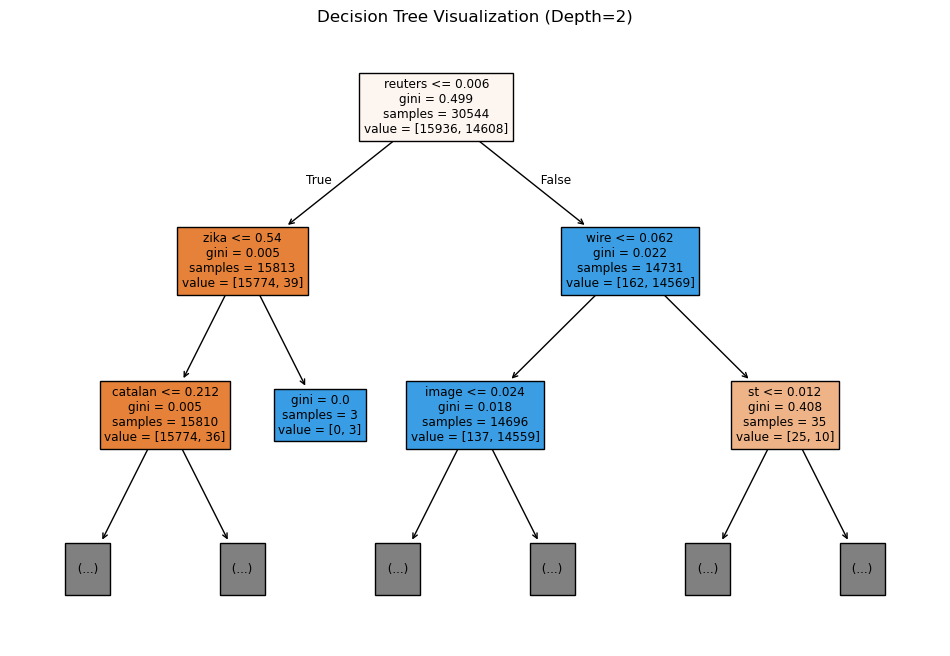

In [84]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Here I am visualizing the decision tree 
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(), max_depth=2)
plt.title("Decision Tree Visualization (Depth=2)")
plt.show()

In [87]:
# Extract feature importance scores
feature_importances = dt_classifier.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top 20 most important words
important_indices = feature_importances.argsort()[-20:][::-1]
important_words = [(feature_names[i], feature_importances[i]) for i in important_indices]

# Display the most important words
for word, importance in important_words:
    print(f"{word}: {importance:.5f}")

reuters: 0.97400
wire: 0.00228
image: 0.00099
st: 0.00094
really: 0.00085
actually: 0.00077
nomination: 0.00060
saidthe: 0.00057
clintonthe: 0.00054
saidvia: 0.00052
lawless: 0.00052
wiretv: 0.00052
aka: 0.00052
probably: 0.00043
work: 0.00041
zika: 0.00039
wfb: 0.00039
countriesthe: 0.00039
syriathe: 0.00039
yearthe: 0.00039


In [91]:
from sklearn.ensemble import RandomForestClassifier

# I am using the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)  
# We can tune n_estimators, max_depth, min_samples_split, etc.

# Train the model using TF-IDF transformed data
rf_classifier.fit(tfidf_train, y_train)

# Predict on the validation set
rf_pred = rf_classifier.predict(tfidf_val)

# Evaluate the model
rf_accuracy = accuracy_score(y_val, rf_pred)
print(f"Random Forest Accuracy (TfidfVectorizer): {rf_accuracy}")

# Confusion Matrix
rf_cm = confusion_matrix(y_val, rf_pred, labels=[0, 1])
print("Confusion Matrix (Random Forest - TFidfVectorizer):")
print(rf_cm)


Random Forest Accuracy (TfidfVectorizer): 0.995417048579285
Confusion Matrix (Random Forest - TFidfVectorizer):
[[3942   17]
 [  18 3660]]


In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Instantiate the Support Vector Classifier
svm_classifier = SVC(random_state=42, kernel='linear')  
# You can change kernel ('linear', 'rbf', etc.) and tune C, gamma, etc.

# Train the model using TF-IDF transformed data
svm_classifier.fit(tfidf_train, y_train)

# Predict on the validation set
svm_pred = svm_classifier.predict(tfidf_val)

# Evaluate the model
svm_accuracy = accuracy_score(y_val, svm_pred)
print(f"Support Vector Machine Accuracy (TfidfVectorizer): {svm_accuracy}")

# Confusion Matrix
svm_cm = confusion_matrix(y_val, svm_pred, labels=[0, 1])
print("Confusion Matrix (SVM - TFidfVectorizer):")
print(svm_cm)


Support Vector Machine Accuracy (TfidfVectorizer): 0.9934529265418358
Confusion Matrix (SVM - TFidfVectorizer):
[[3930   29]
 [  21 3657]]


In [95]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                                        ('rf', RandomForestClassifier(random_state=42))])

In [99]:
voting_clf.fit(tfidf_train,y_train)
vot_pred= voting_clf.predict(tfidf_val)
vot_accuracy = accuracy_score(y_val,vot_pred)
print(f"Voting classifier Accuracy (TfidfVectorizer): {vot_accuracy}")

# Confusion Matrix
vot_cm = confusion_matrix(y_val, vot_pred, labels=[0, 1])
print("Confusion Matrix (vot - TFidfVectorizer):")
print(vot_cm)

Voting classifier Accuracy (TfidfVectorizer): 0.9900484483435904
Confusion Matrix (vot - TFidfVectorizer):
[[3950    9]
 [  67 3611]]


In [101]:
tfidf_test = tfidf_vectorizer.transform(X_test)
# Now test the data on the test dataset
vot_pred_test= voting_clf.predict(tfidf_test)
vot_accuracy_test = accuracy_score(y_test,vot_pred_test)
print(f"Voting classifier Accuracy on test data (TfidfVectorizer): {vot_accuracy_test}")

# Confusion Matrix
vot_cm_test = confusion_matrix(y_test, vot_pred_test, labels=[0, 1])
print("Confusion Matrix (vot-test - TFidfVectorizer):")
print(vot_cm_test)

Voting classifier Accuracy on test data (TfidfVectorizer): 0.9894627485900861
Confusion Matrix (vot-test - TFidfVectorizer):
[[3591   16]
 [  55 3076]]
